**Number of Instances:**

178

**Number of Attributes:**

13 numeric, predictive attributes and the class

**Attribute Information:**

Alcohol

Malic acid

Ash

Alcalinity of ash

Magnesium

Total phenols

Flavanoids

Nonflavanoid phenols

Proanthocyanins

Color intensity

Hue

OD280/OD315 of diluted wines

Proline



**Three classes corresponding to the wine's origin:**

Class 1: Wines from the first region (denoted as "class_0")

Class 2: Wines from the second region (denoted as "class_1")

Class 3: Wines from the third region (denoted as "class_2")

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture


# Настройки для визуализации
sns.set(style="ticks")
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# 1) Загрузка датасета Wine
wine = datasets.load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

print(f"Размерность исходных данных X: {X.shape}")
print(f"Количество классов (сортов вина): {len(np.unique(y))}")
print(f"Названия признаков: {feature_names}")

df_wine = pd.DataFrame(X, columns=feature_names)
df_wine['target'] = y
df_wine.head()

Размерность исходных данных X: (178, 13)
Количество классов (сортов вина): 3
Названия признаков: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# 2) Выбор подмножества признаков
selected_features = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
    'magnesium', 'total_phenols', 'flavanoids', 'color_intensity'
]
X_selected = df_wine[selected_features].values

print(f"\nРазмерность выбранных данных X_selected: {X_selected.shape}")

scaler = StandardScaler()
X_scaled_d1 = scaler.fit_transform(X_selected)

D1 = X_scaled_d1
print(f"Размерность датасета D1 (масштабированного): {D1.shape}")


Размерность выбранных данных X_selected: (178, 8)
Размерность датасета D1 (масштабированного): (178, 8)


In [4]:
# 3) Снижение размерности с помощью PCA до 2 компонент
pca = PCA(n_components=2, random_state=52)
D2 = pca.fit_transform(D1)

print(f"\nРазмерность датасета D2: {D2.shape}")


Размерность датасета D2: (178, 2)


In [5]:
# 4) Снижение размерности с помощью t-SNE до 2 компонент
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
D3 = tsne.fit_transform(D1)

print(f"\nРазмерность датасета D3 (после t-SNE): {D3.shape}")

  File "C:\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python313\Lib\subprocess.py", line 1548, in _execute_child
    hp, ht, pi


Размерность датасета D3 (после t-SNE): (178, 2)


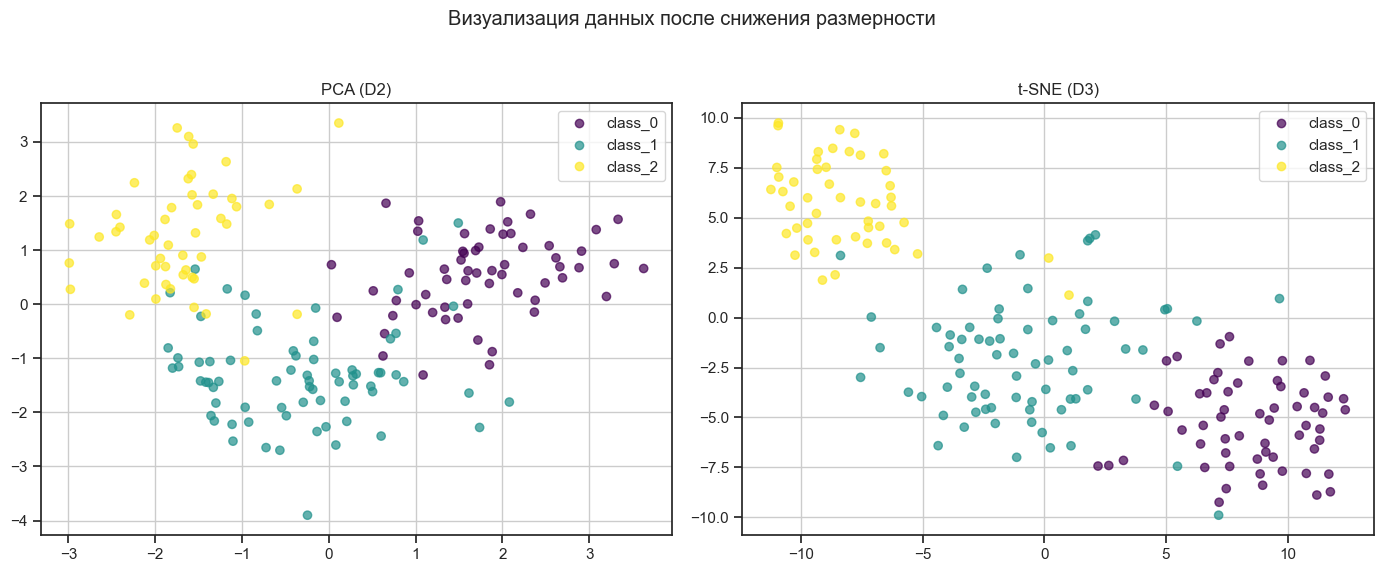

In [6]:
# 5) Визуализация D2 (PCA) и D3 (t-SNE)
plt.figure(figsize=(14, 6))


target_names_list = list(wine.target_names)

plt.subplot(1, 2, 1)
scatter_pca = plt.scatter(D2[:, 0], D2[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA (D2)')
legend_handles_pca, _ = scatter_pca.legend_elements()
plt.legend(handles=legend_handles_pca, labels=target_names_list)
plt.grid(True)

plt.subplot(1, 2, 2)
scatter_tsne = plt.scatter(D3[:, 0], D3[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE (D3)')
legend_handles_tsne, _ = scatter_tsne.legend_elements()
plt.legend(handles=legend_handles_tsne, labels=target_names_list)
plt.grid(True)

plt.suptitle("Визуализация данных после снижения размерности")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
def tune_dbscan_ari(data, true_labels, eps_values, min_samples_values, dataset_name):
    print(f"\nПодбор параметров DBSCAN для {dataset_name}")
    best_score = -1.1
    best_params = {'eps': None, 'min_samples': None}
    results_list = []
    for eps_val in eps_values:
        for min_samples_val in min_samples_values:
            dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val, n_jobs=-1)
            labels = dbscan.fit_predict(data)
            score = adjusted_rand_score(true_labels, labels)
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            results_list.append({
                'eps': eps_val, 'min_samples': min_samples_val,
                'n_clusters': n_clusters_, 'n_noise': n_noise_, 'ARI': score
            })
            if score > best_score:
                best_score = score
                best_params = {'eps': eps_val, 'min_samples': min_samples_val}
    results_df = pd.DataFrame(results_list)
    print("Результаты подбора (топ-5)")
    print(results_df.sort_values(by='ARI', ascending=False).head(5))
    return best_params

# Определение сеток параметров
eps_values_d1 = np.linspace(0.1, 5, 100)
min_samples_values_d1 = np.arange(2, 11)

eps_values_d2 = np.linspace(0.1, 5, 100)
min_samples_values_d2 = np.arange(2, 31)

eps_values_d3 = np.linspace(0.1, 5, 100)
min_samples_values_d3 = np.arange(2, 31)

# Запуск подбора параметров
best_params_d1 = tune_dbscan_ari(D1, y, eps_values_d1, min_samples_values_d1, "D1")
best_params_d2 = tune_dbscan_ari(D2, y, eps_values_d2, min_samples_values_d2, "D2")
best_params_d3 = tune_dbscan_ari(D3, y, eps_values_d3, min_samples_values_d3, "D3")


# Кластеризация и Оценка

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=52, n_init=10)
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
dbscan_d1_tuned = DBSCAN(**best_params_d1)
dbscan_d2_tuned = DBSCAN(**best_params_d2)
dbscan_d3_tuned = DBSCAN(**best_params_d3)


datasets_to_cluster = {
    'D1_scaled': D1,
    'D2_PCA': D2,
    'D3_tSNE': D3
}

results_clustering = []


for d_name, data in datasets_to_cluster.items():

    algorithms_to_run = {
        'KMeans': kmeans,
        'Agglomerative': agglomerative
    }
    if d_name == 'D1_scaled' and dbscan_d1_tuned:
        algorithms_to_run['DBSCAN_tuned'] = dbscan_d1_tuned
    elif d_name == 'D2_PCA' and dbscan_d2_tuned:
        algorithms_to_run['DBSCAN_tuned'] = dbscan_d2_tuned
    elif d_name == 'D3_tSNE' and dbscan_d3_tuned:
        algorithms_to_run['DBSCAN_tuned'] = dbscan_d3_tuned

    for alg_name, algorithm in algorithms_to_run.items():
        labels = algorithm.fit_predict(data)

        unique_labels = set(labels)
        if -1 in unique_labels:
             n_unique_clusters = len(unique_labels) - 1
        else:
             n_unique_clusters = len(unique_labels)

        # Расчет метрик
        ari = adjusted_rand_score(y, labels)
        ami = adjusted_mutual_info_score(y, labels)
        homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y, labels)

        silhouette = silhouette_score(data, labels)

        # Сохранение результатов
        results_clustering.append({
            'Dataset': d_name,
            'Algorithm': alg_name,
            'ARI': ari,
            'AMI': ami,
            'Homogeneity': homogeneity,
            'Completeness': completeness,
            'V-measure': v_measure,
            'Silhouette': silhouette,
            'N_clusters_found': n_unique_clusters
        })

results_df_final = pd.DataFrame(results_clustering)

print("\n\nТаблица результатов кластеризации\n")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
results_df_final


Подбор параметров DBSCAN для D1
Результаты подбора (топ-5)
       eps  min_samples  n_clusters  n_noise    ARI
300 1.7333            5           2       28 0.3672
302 1.7333            7           2       34 0.3636
303 1.7333            8           2       38 0.3487
301 1.7333            6           2       33 0.3479
291 1.6838            5           2       35 0.3335

Подбор параметров DBSCAN для D2
Результаты подбора (топ-5)
       eps  min_samples  n_clusters  n_noise    ARI
357 0.6939           11           3       18 0.6087
327 0.6444           10           3       19 0.5957
358 0.6939           12           3       21 0.5812
296 0.5949            8           3       24 0.5738
328 0.6444           11           3       25 0.5640

Подбор параметров DBSCAN для D3
Результаты подбора (топ-5)
        eps  min_samples  n_clusters  n_noise    ARI
2115 3.6636           29           3        9 0.8020
2173 3.7626           29           3        6 0.7958
2142 3.7131           27           3 

,Dataset,Algorithm,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette,N_clusters_found
0,D1_scaled,KMeans,0.7986,0.7526,0.7552,0.7552,0.7552,0.2848,3
1,D1_scaled,Agglomerative,0.7846,0.7386,0.7379,0.7450,0.7414,0.2671,3
2,D1_scaled,DBSCAN_tuned,0.3672,0.4441,0.4179,0.4884,0.4504,0.2075,2
3,D2_PCA,KMeans,0.7409,0.6844,0.6898,0.6857,0.6878,0.5215,3
4,D2_PCA,Agglomerative,0.6947,0.6637,0.6669,0.6675,0.6672,0.5020,3
5,D2_PCA,DBSCAN_tuned,0.6087,0.5574,0.6213,0.5160,0.5638,0.4431,3
6,D3_tSNE,KMeans,0.7999,0.7658,0.7693,0.7671,0.7682,0.5599,3
7,D3_tSNE,Agglomerative,0.7530,0.7274,0.7307,0.7299,0.7303,0.5573,3
8,D3_tSNE,DBSCAN_tuned,0.8020,0.7696,0.8266,0.7262,0.7731,0.5069,3
